在用 Pytorch 进行回归分析的过程中，一般可分为 4 步：  
1. 准备数据集
2. 设计模型，继承自 nn.Module，用于计算 $\hat{y}$
3. 构建 loss 函数和优化器
4. 训练，前馈、反馈、更新  


下面分别叙述

## 准备训练集
具体训练集比较复杂，现在先采用之前用的简单的数据集，但是改为使用 Tensor 存储

In [14]:
import torch

x_data = torch.Tensor([[1.0], [2.0], [3.0], [4.0]])
y_data = torch.Tensor([[2.0], [4.0], [6.0], [8.0]])

## 设计模型
一般继承自 nn.Module 和 nn.Functions 等，现阶段先继承 nn.Module

In [15]:
class LinearModel(torch.nn.Module):
    def __init__(self) -> None:
        super(LinearModel, self).__init__()
        self.linear = torch.nn.Linear(1, 1)

    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred

model = LinearModel()

继承 nn.Module 要求类必须实现 init 和 forward 方法  
Linear 对象包括 2 个 Tensor 成员：weight 和 bias，即线性方程 $y = \omega x + b$ 的 $\omega$和$b$  
因此这里 `Linear(1, 1)`构造函数，接受的`in_feature`：输入样本x的特征数，`out_feature`：输出样本y的特征数  
`forward`函数用到了`linear`对象实现的方法：`__call__()`，因此让语句`y_pred = self.linear(x)`看起来像函数

简单介绍一下`__call__()`:

In [16]:
from typing import Any


class foobar():
    def __init__(self) -> None:
        pass
    
    def __call__(self, *args: Any, **kwds: Any) -> Any:
        print("args[0] = " + str(args[0]))

fb = foobar()
fb(1, 2, 3)

args[0] = 1


而 Linear 类的 call 方法调用了 forward 方法，因此继承了 uu.Module 的方法必须实现 forward 方法。

## 构造损失函数和优化器

In [17]:
criterion = torch.nn.MSELoss(size_average=False)

optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

/Users/liyang/miniconda3/envs/d2l/lib/python3.9/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


这里的`criterion`, `optimizer`都是对象，`MSELoss`, `SGD`都是类，都采用了`__call__`  
内置的 MSELoss 方法就是之前用的 $(\hat{y}_{n}-y_{n})^{2}$，参数`size_average`是指最终的 loss 需不需要处以个数，即求平均，其实求不求都可以。  
`model.parameters()`会检查对象的所有成员，并返回权重  
lr 即 learnrate 学习率，一般设置为固定值，当然也可以在不同部分使用不同的学习率

## 训练模型

In [18]:
epoch_list = []
loss_list = []

for epoch in range(100):
    y_pred = model(x_data)
    loss = criterion(y_pred, y_data)    # 前馈

    optimizer.zero_grad()       # 不保存每一轮训练的梯度
    loss.backward()             # 向后传播
    optimizer.step()            # 更新权重

    epoch_list.append(epoch)
    loss_list.append(loss.item())


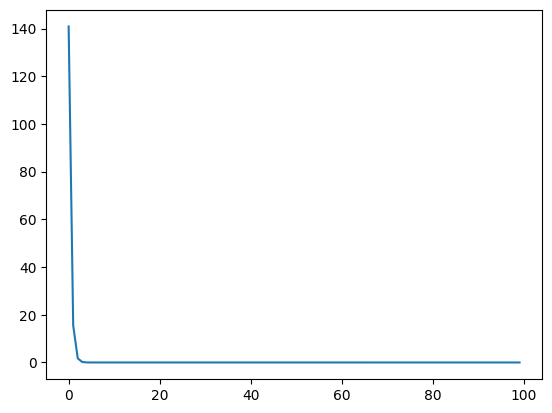

In [19]:
import matplotlib.pyplot as plt
plt.plot(epoch_list, loss_list)
plt.show()

In [20]:
# 最后预测的值
print("w is ", model.linear.weight.item())
print("b is ", model.linear.bias.item())

w is  1.9945378303527832
b is  0.016059335321187973


注意，增加训练轮数可以让模型在训练集上表现更好，但是有可能过拟合，让训练集只在训练集表现好，一旦转移到测试集和预测集上，表现突然变差